## GRIP TASK: Spark Foundation-April 2023 (Data Science and Business Analytics Intern)
## Name: Pranshu Singh
Task 3: Exploratory Data Analysis - Retail

> In this task, as a business manager, we need to find out the weak areas where you can work to make more profit & business problems we can derive by exploring the data using ‘Exploratory Data Analysis’ on dataset ‘SaplteSuperstore’.
### Steps:

* 1 - Importing the dataset
* 2 - Listing unique values for each property
* 3 - Visualization of Outliers in dataset
* 4 - Visualization of Store data
* 5 - Exploratory Data Analysis
     - Visualizing the Sales vs Profits in different Regions
     - Visualizing the Sales vs Profits in different Category
     - Visualizing the Sales vs Profits for Ship Modes
     - Visualizing the Sales vs Profits in different States
     - Visualizing the Sales vs Profits in different Cities
     - Visualizing Sub Categories
     - Visualizing the Sales vs Profits Analysis

### 1 - Importing the dataset

In [4]:
import numpy as num
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
store_data = pd.read_csv("T3_data.csv")
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
store_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
store_data.duplicated().sum()

17

> There are total 17 duplicate data items, so we remove it for the dataset "store_data"

In [8]:

store_data.drop_duplicates().shape

(9977, 13)

In [9]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

> As per above data we can conclude that "store_data" does not have any null data. That means we can work on the dataset now as there is no ambigious data.

In [11]:
store_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

> Here, we have:
* 3 Contineous type of data
* 1 Discrete type of data
* 1 Ordinal type of data
* Rest 9 columns are Nominal type of data

In [12]:
#store_data.nunique()
store_data.describe(include='all')

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


> From the above data we can analyze unique categories and max, min values for each attribute.

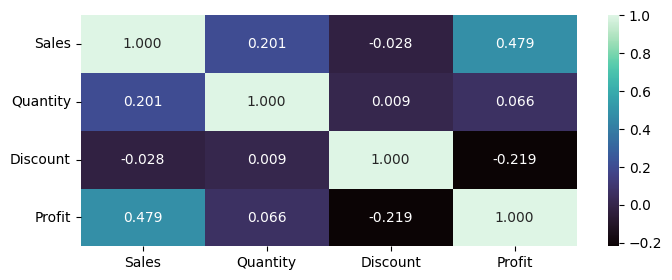

In [13]:
corr_num=store_data.loc[:,['Sales','Quantity','Discount','Profit']]
plt.figure(figsize=(8,3))
sns.heatmap(corr_num.corr(), fmt='0.3f', cmap='mako', annot=True)
plt.show()

> From the above analysis of heatmap we can say...
* Profit and Discount are negatively correlated
* Profit and Sales are positively correlated
* Discount has some what negative correlation with the Sales.

### 2 - Listing unique values for each property

In [14]:
for i in store_data.columns:
    print('Total unique count of', i + '  :',store_data[i].nunique())

Total unique count of Ship Mode  : 4
Total unique count of Segment  : 3
Total unique count of Country  : 1
Total unique count of City  : 531
Total unique count of State  : 49
Total unique count of Postal Code  : 631
Total unique count of Region  : 4
Total unique count of Category  : 3
Total unique count of Sub-Category  : 17
Total unique count of Sales  : 5825
Total unique count of Quantity  : 14
Total unique count of Discount  : 12
Total unique count of Profit  : 7287


### 3 - Visualization of Outliers in dataset

<Axes: >

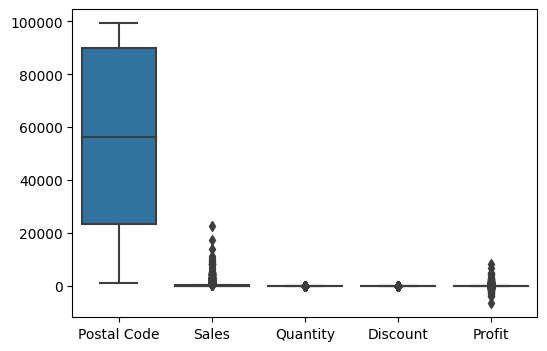

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(data=store_data)

<Axes: xlabel='Category', ylabel='Sales'>

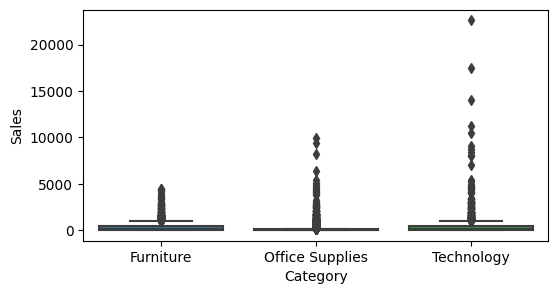

In [17]:
plt.figure(figsize=(6,3))
sns.boxplot(x='Category', y='Sales', data=store_data)

> Form the above boxplot, ignoring postal code, Sales and Profit have most Outliers and are specific to Technology and office Supplies w.r.t. sales.

### 4 - Visualization of Store data

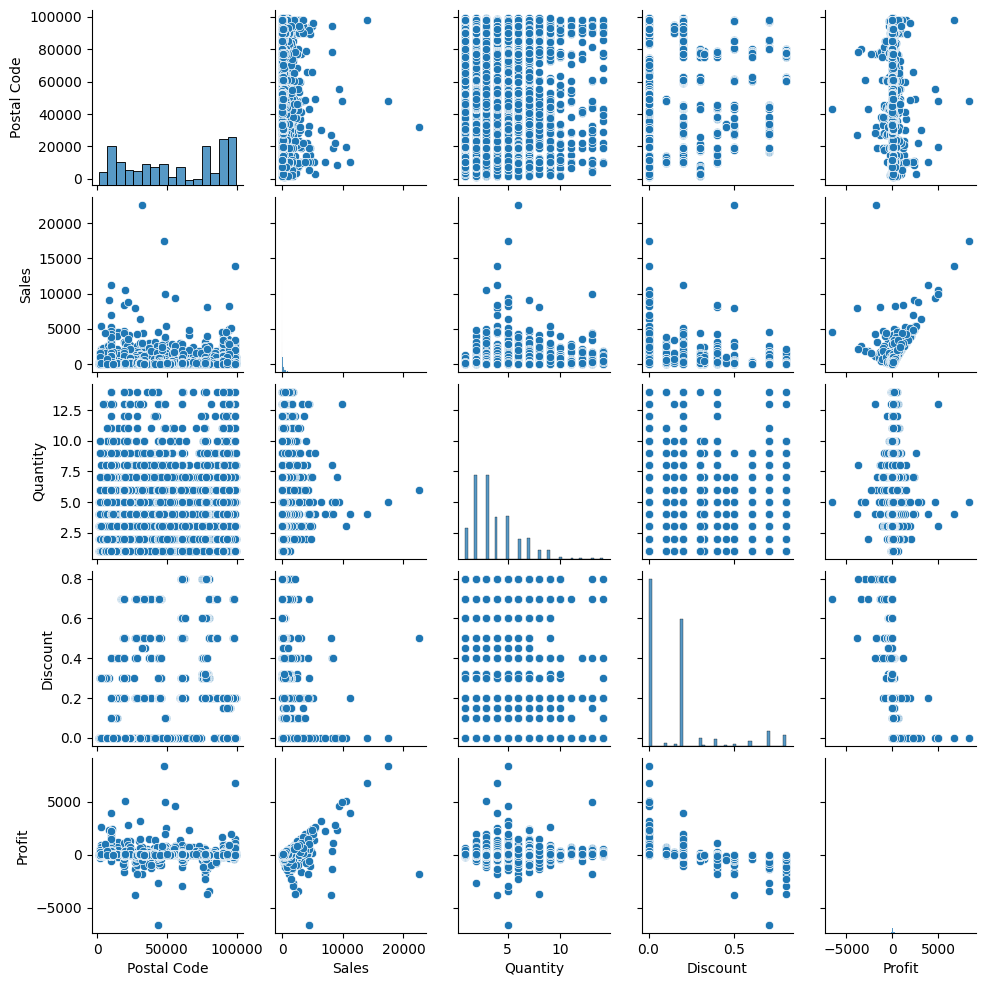

In [18]:
sns.pairplot(store_data, height=2)
plt.show()

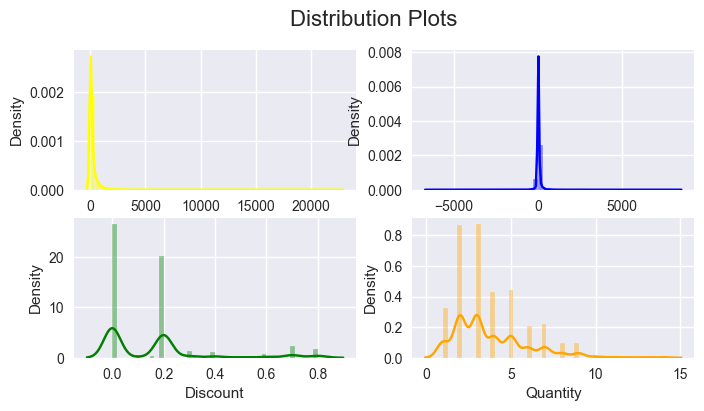

In [251]:
fig,axes = plt.subplots(2,2,figsize=(8,4))
fig.suptitle("Distribution Plots",fontsize=16)
sns.distplot(store_data['Sales'], color='yellow', ax=axes[0,0])
sns.distplot(store_data['Profit'], color='blue', ax=axes[0,1])
sns.distplot(store_data['Discount'], color='green', ax=axes[1,0])
sns.distplot(store_data['Quantity'], color='orange', ax=axes[1,1])
plt.show()

> From, above displots which represents distribution of Quantitative Attributes:
* Most sales are in around range [0-623]
* Profit range is [-206 - 234]
* Most Discount lies between [0-0.2]
* Most Quantity Count lies between [0-6]

### 5 - Exploratory Data Analysis

Here, we will visualize & Explore all the unique features of each column and compare them to find the dependencies between them.

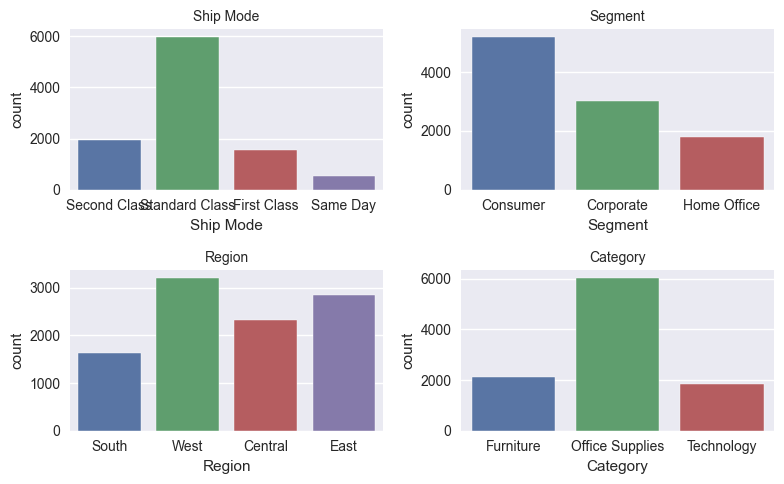

In [257]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(8,5))
sns.countplot(x = store_data['Ship Mode'], ax = axs[0][0])
sns.countplot(x = store_data['Segment'], ax = axs[0][1])
sns.countplot(x = store_data['Region'], ax = axs[1][0])
sns.countplot(x = store_data['Category'], ax = axs[1][1])
axs[0][0].set_title('Ship Mode', fontsize = 10)
axs[0][1].set_title('Segment', fontsize = 10)
axs[1][0].set_title('Region', fontsize = 10)
axs[1][1].set_title('Category', fontsize = 10)

plt.tight_layout()

> * Standard Class is often chosen shipment mode for sales.
> * Large number of consumers are involved who purchase these products from categories.
> * As, Southern regions have comparatively least sales, so one conclusion we can derive from it that there is need of improvement.
> * Most common items that are bought are from Office Supplies.

### 5a - Visualizing the Sales vs Profits in different Regions

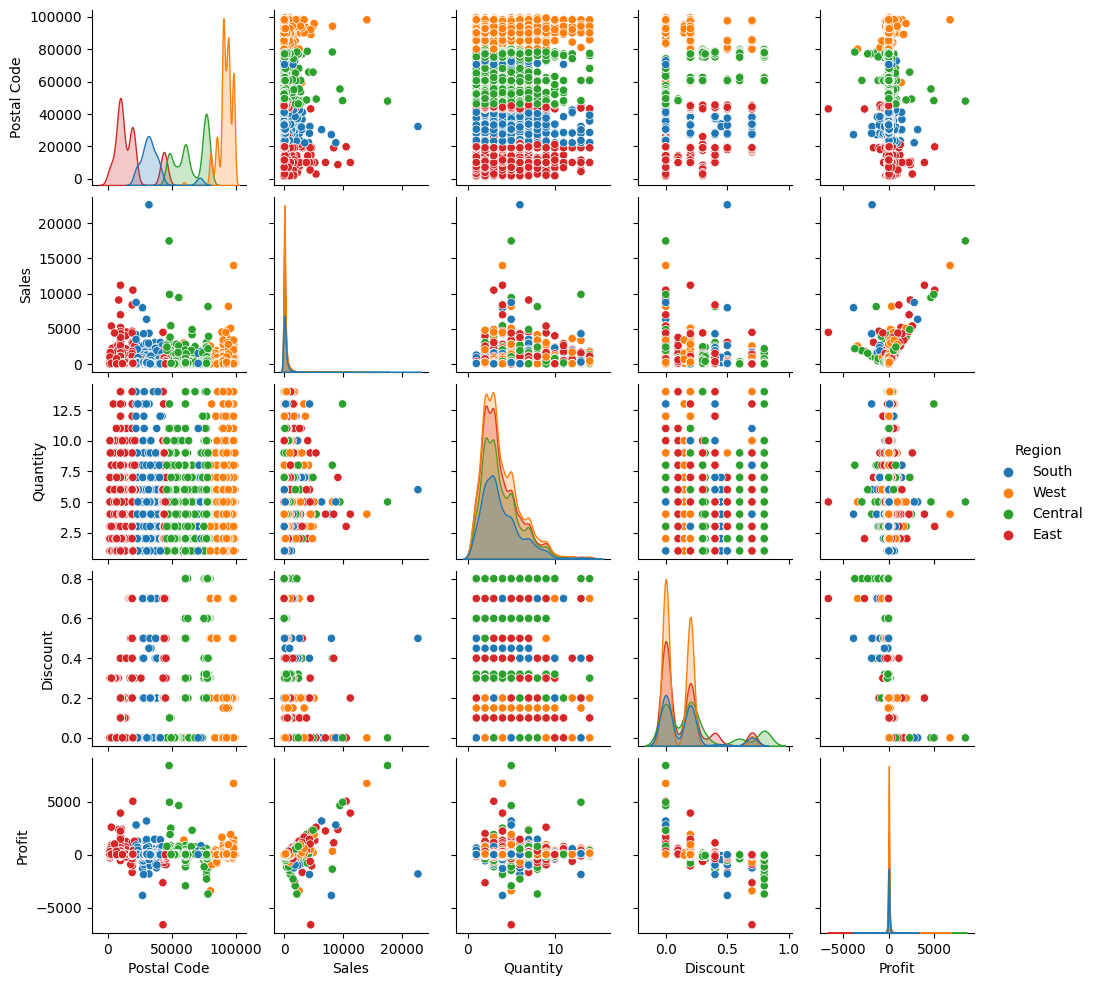

In [21]:
sns.pairplot(data=store_data, hue='Region', height=2)
plt.show()

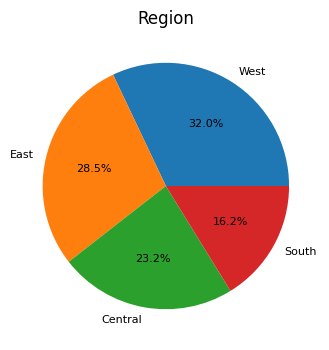

In [22]:
plt.figure(figsize = (4,4))
textprops = {"fontsize":8}
plt.title('Region', fontsize='12')
plt.pie(store_data['Region'].value_counts(), labels=store_data['Region'].value_counts().index, autopct='%1.1f%%', textprops=textprops)
plt.show()

> The graph shows that West and East have same Profit though sales in the East are less as compared to West.

### 5b - Visualizing the Sales vs Profits in different Category

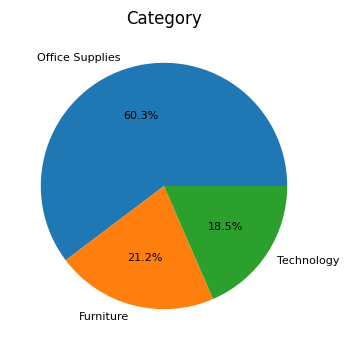

In [23]:
plt.figure(figsize = (4,4))
textprops = {"fontsize":8}
plt.title('Category', fontsize='12')
plt.pie(store_data['Category'].value_counts(), labels=store_data['Category'].value_counts().index,autopct='%1.1f%%', textprops=textprops)
plt.show()

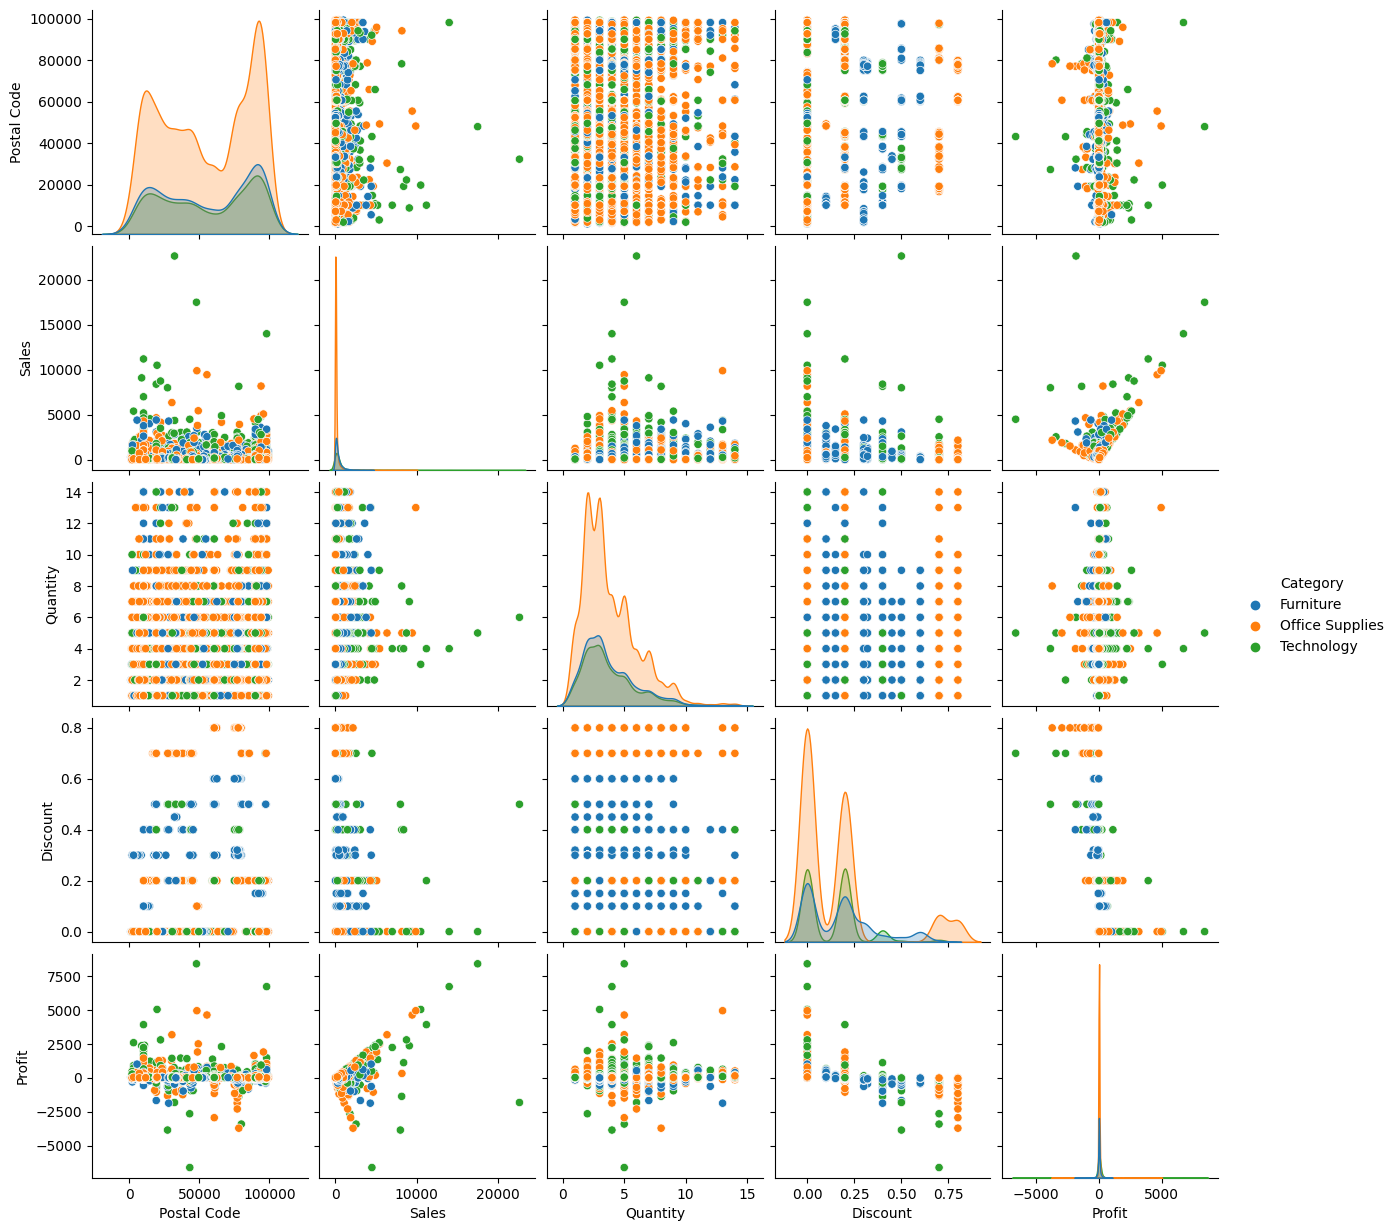

In [24]:
sns.pairplot(data=store_data,hue='Category')
plt.show()

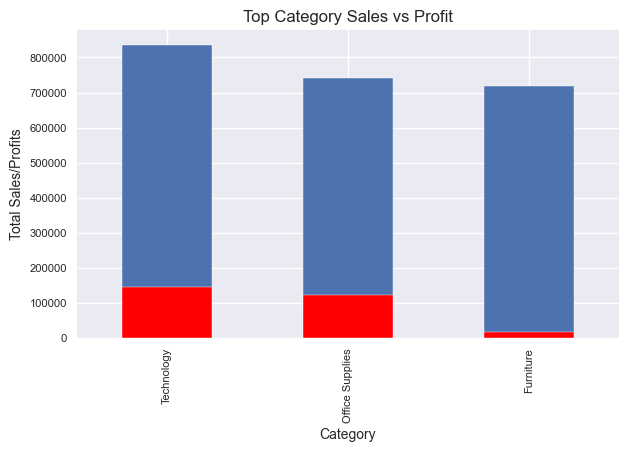

In [273]:
top_category_s = store_data.groupby("Category").Sales.sum().nlargest(n=100)
top_category_p = store_data.groupby("Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (7,4),fontsize = 8)
top_category_p.plot(kind = 'bar',figsize = (7,4),fontsize = 8, color='red')
plt.xlabel('Category',fontsize = 10)
plt.ylabel('Total Sales/Profits',fontsize = 10)
plt.title("Top Category Sales vs Profit",fontsize = 12)
plt.show()

> Inference: From above graph we conclude that maximum profit has been made in the Technology & Office Category.

### 5c - Visualizing the Sales vs Profits for Ship Modes

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

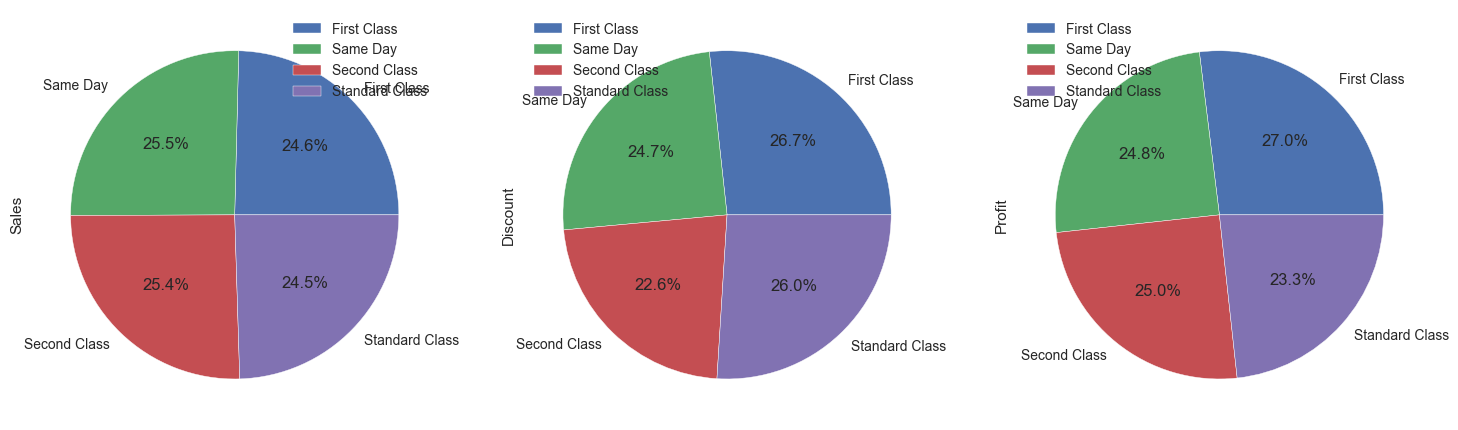

In [315]:
df_shipmode = store_data.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
df_shipmode.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', 
                     labels = df_shipmode.index)

### 5d - Visualizing the Sales vs Profits in different States

<Axes: xlabel='State', ylabel='count'>

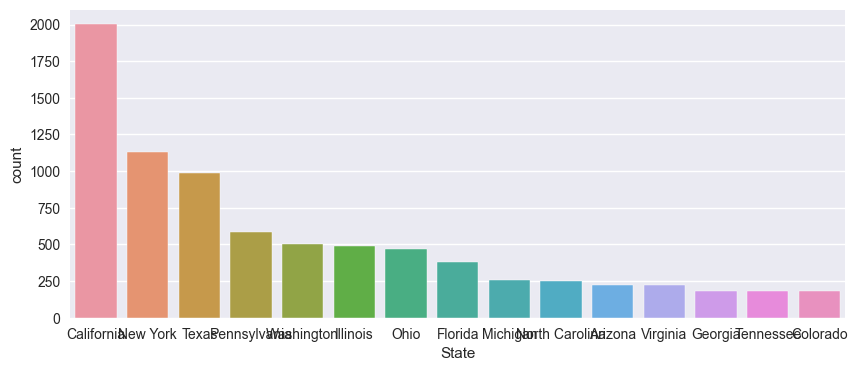

In [305]:
plt.figure(figsize=(10,4))
sns.countplot(x=store_data.State,order=(store_data.State.value_counts().head(15)).index)

> Infernce: This bar chart shows that the states California, New York & Texas alone has over 40% of total stores in United States.

> In this data, Wyoming has least number of deals.

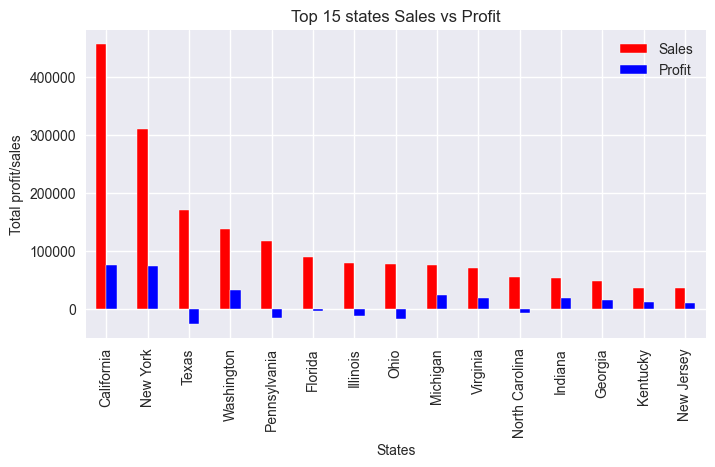

In [312]:
state=store_data.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
state[:15].plot(kind='bar', figsize=(8,4), color=['red','blue'])
plt.title('Profit and sales in top 20 states ', fontsize = '12')
plt.xlabel('States', fontsize = '10')
plt.ylabel('Total profit/sales', fontsize='10')
plt.title("Top 15 states Sales vs Profit",fontsize = '12')

plt.style.use('seaborn')
plt.show()


> Inference: Some sales have losses, there is need to minimize those sales. Texas, Ohio & Pennsylvania have one of the highest loss of all states.

### 5e - Visualizing the Sales vs Profits in different Cities

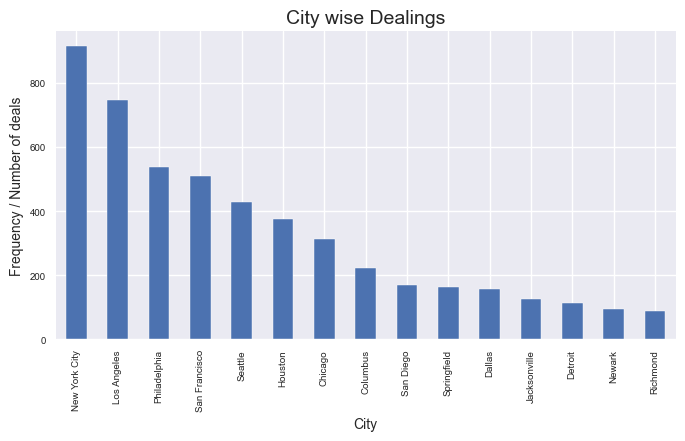

In [313]:
df2=store_data['City'].value_counts().head(15)
df2.plot(kind='bar',figsize=(8,4), fontsize=7)
plt.ylabel('Frequency / Number of deals', fontsize=10)
plt.xlabel('City', fontsize=10)
plt.title('City wise Dealings',fontsize=14)
plt.show()

> From the above bar chart we can say that, New Yourk CIty, Los Angles & Philadelphia has highest number of deals.

### 5f - Visualizing Sub Categories

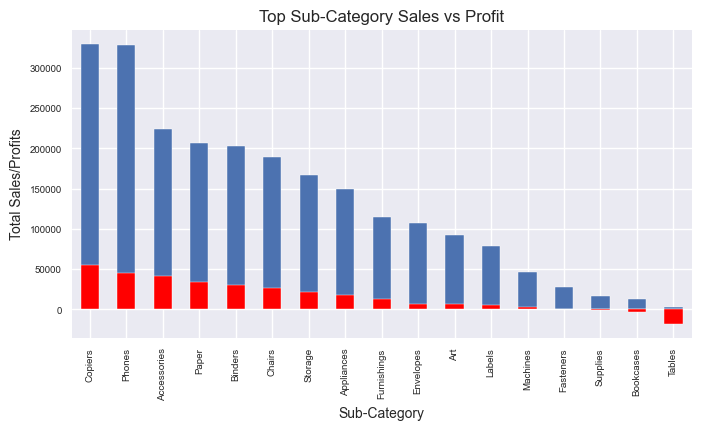

In [314]:
top_subcategory_s = store_data.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
top_subcategory_p = store_data.groupby("Sub-Category").Profit.sum().nlargest(n = 100)
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar',figsize = (8,4),fontsize = 7)
top_subcategory_p.plot(kind = 'bar',figsize = (8,4),fontsize = 7, color = 'red')
plt.xlabel('Sub-Category',fontsize = 10)
plt.ylabel('Total Sales/Profits',fontsize = 10)
plt.title("Top Sub-Category Sales vs Profit",fontsize = 12)
plt.show()

<Axes: ylabel='Sub-Category'>

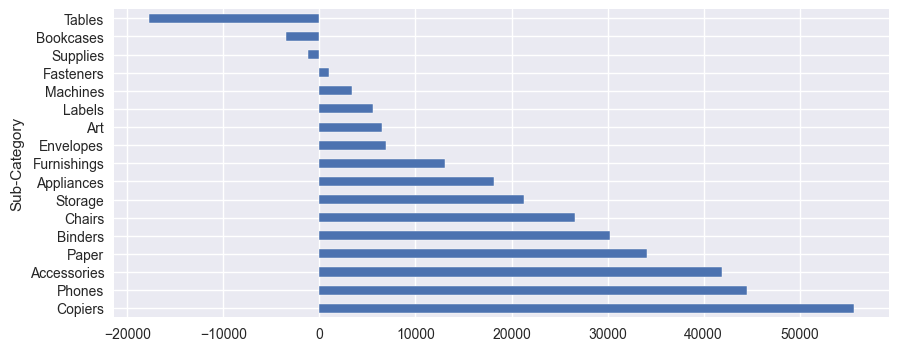

In [298]:
plt.figure(figsize=(10,4))
statewise = store_data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
statewise.plot.barh()


> The above graph clearly shows that Copiers and Phones have the highest sales and profit and tables has negative profit

### 5g - Visualizing the Sales vs Profits Analysis

Text(0.5, 1.0, 'Discount')

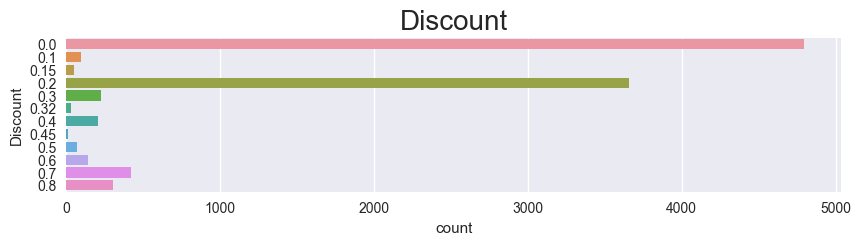

In [30]:
plt.figure(figsize=(10,2))
sns.countplot(y='Discount', data=store_data)
plt.title('Discount',fontsize=20)

> As per above, data most common discount is of 0.2 ignoring sales with no discount i.e. 0.

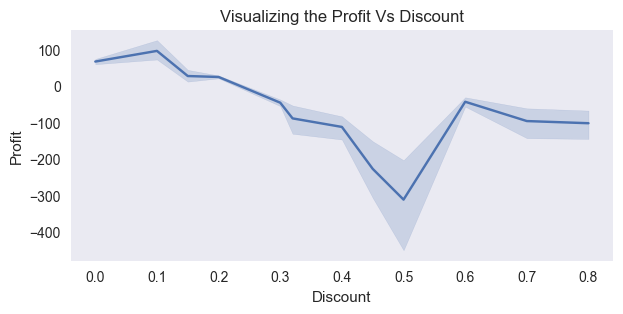

In [29]:
plt.figure(figsize=(7,3))
sns.lineplot(x=store_data['Discount'], y=store_data['Profit'], data=store_data)
plt.title('Visualizing the Profit Vs Discount')
plt.grid()

Text(0.5, 1.0, 'Segment wise analysis of Sale, Discount, profit')

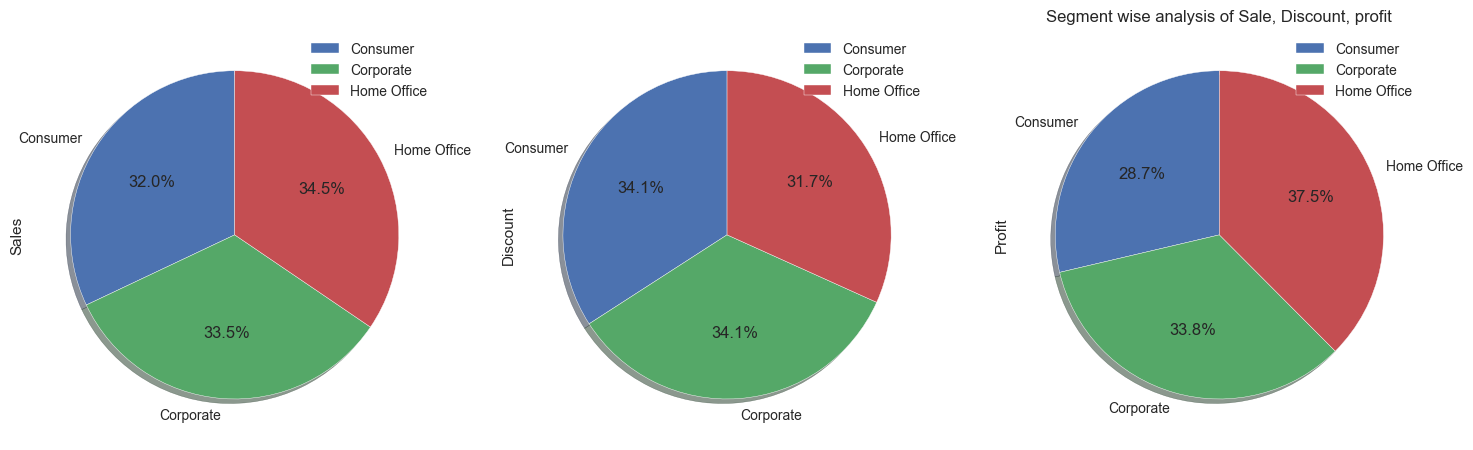

In [237]:
df_seg = store_data.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_seg.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(18, 20), startangle=90, shadow=True, labels = df_seg.index)
plt.title('Segment wise analysis of Sale, Discount, profit')

> It seems, with respect to Segment, there is no sufficient differences in sales or profit or discount.

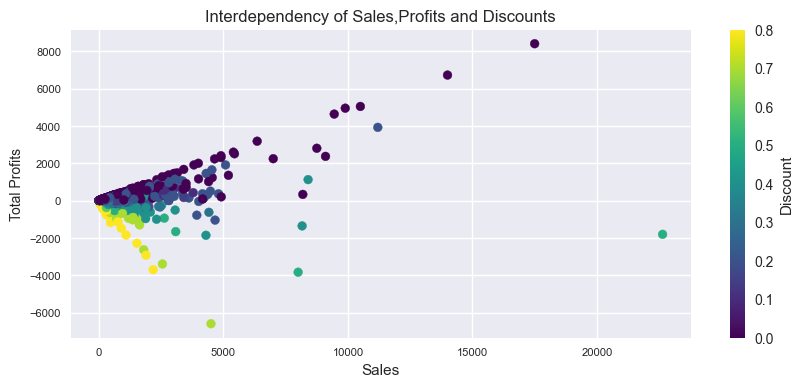

In [31]:
plt.style.use('seaborn')
store_data.plot(kind = "scatter",figsize = (10,4), x = "Sales", y= "Profit", c = "Discount", s = 40,fontsize = 8, colormap = "viridis")
plt.ylabel('Total Profits',fontsize = 10)
plt.title("Interdependency of Sales,Profits and Discounts",fontsize = 12)
plt.show()

> The graph clearly shows that if we give more Discount on our products sales increases but profit decreases.

array([<Axes: ylabel='Sales'>, <Axes: ylabel='Discount'>,
       <Axes: ylabel='Profit'>], dtype=object)

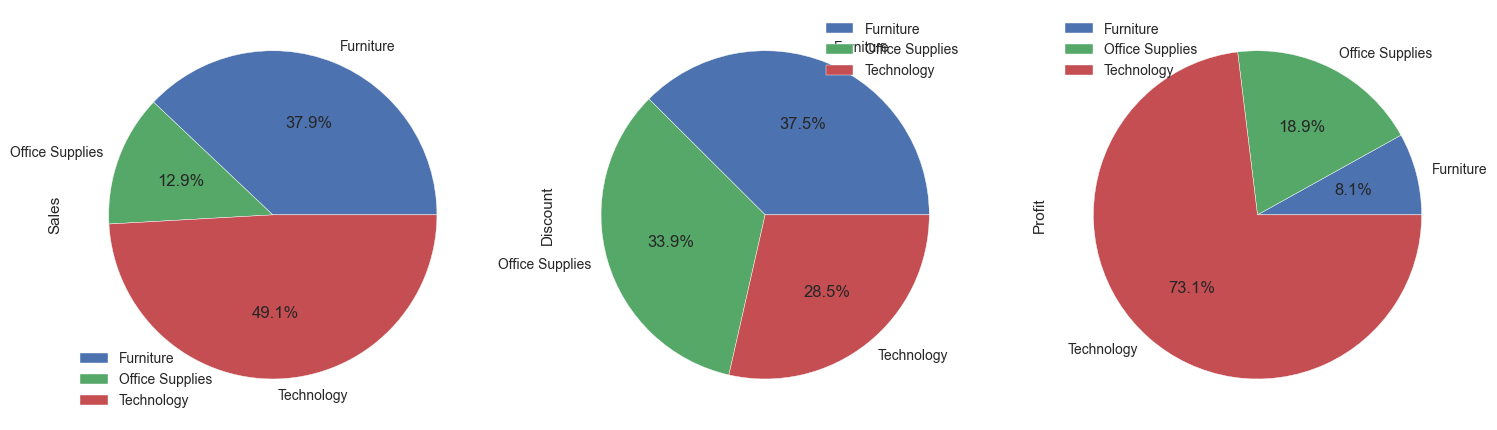

In [244]:
df_cat = store_data.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_cat.plot.pie(subplots=True, figsize=(18, 20), autopct='%1.1f%%', 
                     labels = df_cat.index)

> Here, minimum profit is obtained in furniture products.

> Maximun sales and profit is obtained in Technology.

### Conclusion:


* Profit and Discount are negatively correlated.
* Profit and Sales are positively correlated.
* Discount has some what negative correlation with the Sales.
* Form the above boxplot, ignoring postal code, Sales and Profit have most Outliers and are specific to Technology and office Supplies w.r.t. sales.
* Profit and Discount is high in First Class.
* Most common discount on products with sales.
* Sales is high for Same day ship.
* The graph shows that West and East have same Profit though sales in the East are less as compared to West.
* Sub-category: Copier: High Profit & sales.
* Maximum profit has been made in the Technology & Office Category.
* Highest sales states: California, New York, Texas.
* Sub-category: Binders , Machines and then tables have high Discount.  
* Category: Maximun sales and Profit obtain in Technology.
* Category: Minimun profit obtain in Furniture.
* State: Vermont: Highest Profit    &   Ohio: Lowest Profit.
* Segment: Home-office: High Profit & sales.
* Wyoming: Lowest Number of Deal,highest amount of sales=Wyoming(11.8%)
* Lowest amount of sales = South Dakota(0.8%)

### Suggestions:
* We should limit sales of furniture and increase that of technology and office suppliers as furniture has very less profit as compared to sales.
* Considering the sub-categories sales of tables should be minimized.
* Increase sales more in the east as profit is more.
* We should concentrate on the states like 'New York' and 'California' to make more profits.

## Thank you!